# Sampling Distributions & Statistical Experiments

This kernel will walk you through sampling distributions, statistical experiments and hypothesis testings.


Most examples and data used in this kernel are referenced from Chapter 2 "Data and Sampling Distributions" and Chapter 3 "Statistical Experiments and Significance Testing" in "Practial Statistics for Data Scientists".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

# Data and Sampling Distributions
## 1. Random Sampling and Sample Bias
- Even in the era of big data, random sampling remains an important arrow in the data scientis's quiver.
- Bias occurs when measurements or observations are systematically in error because they are not representative of the full population.
- __Data quality is often more important than data quantity__, and __random sampling can reduce bias and facilitate quality improvement that would otherwise be prohibitively expensive__.

## 2. Selection Bias
- Specifying a hypothesis and then collecting data following randomization and random sampling principles ensures agains bias.
- All other forms of data analysis run the risk of bias resulting from the data collection/analysis process (repeated running of models in data mining, data snooping in research, and after-the-fact selection of interesting events).

## 3. Sampling Distribution of a Statistic
- The frequency distribution of a sample statistic tells us __how that metric would turn out differently from sample to sample__.
- This sampling distribution can be estimated via the __bootstrap__, or via formulas that rely on the central limit theorem.
- A key metric that sums up the variability of a sample statistic is its __standard error__.

## 4. Bootstrapping
- The bootstrap is a powerful tool for __assessing the variability of a sample statistic and has become the standard way to estimate standard error__.
  - Draw a sample value, record it, and then replace it.
  - Repeat n times.
  - Record the mean of the n resampled values.
  - Repeat steps 1-3 R times.
  - Use the R results to:
    - Calculate their standard deviation (this estimates sample mean standard error).
    - Produce a histogram or boxplot.
    - Find a confidence interval.
- The bootstrap can be applied in similar fashion in a wide variety of circumstances, without extensive study of mathematical approximations to sampling distributions.
- It allows us to estimate sampling distributions for statistics where no mathematical approximation has been developed.
- When applied to predictive models, aggregating multiple bootstrap sample predictions (bagging) outperforms the use of a single model.

## 5. Confidence Intervals
- Confidence intervals are the typical way to present estimates as an interval range.
- The more data you have, the less variable a sample estimate will be.
- The lower the level of confidence you can tolerate, the narrower the confidence interval will be.
- __The bootstrap is an effective way to construct confidence intervals__.

## 6. Normal Distribution
- The normal distribution was essential to the historical development of statistics, as it permitted mathematical approximation of uncertainty and variability.
- __While raw data is typically not normally distributed, errors often are, as so are averages and totals in large samples__.
- To convert data to z-scores, you substract the mean of the data and divide by the standard deviations; __you can then compare the data to a normal distribution (QQ Plot)__. Note that converting data to z-scores does not make the data normally distributed. It just puts the data on the same scale as te standard normal distribution.

__Example: QQ plot (Normal Distribution)__

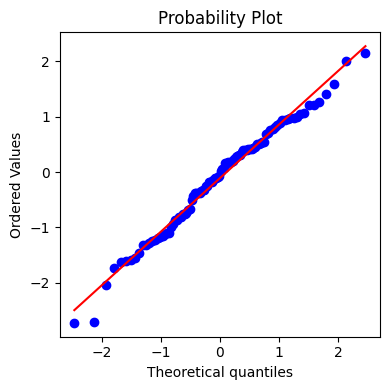

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()


## 7. Long-Tailed Distributions
- __Most data is not normally distributed__.
- Assuming a normal distribution can lead to __underestimation of extreme events__.

__Example: QQ Plot (Long-Tailed Distribution)__

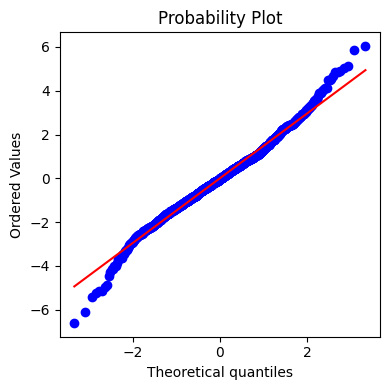

In [5]:
sp500_px = pd.read_csv('data/sp500_data.csv.gz')

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

This shows another common phenomenon: the points are close to the line for the data withi one standard deviation of the mean. Experts refer to this phenomenon as data being "normal in the middle" but having much longer tails. 

## 8. Student's t-Distribution
- The t-distribution is actually a family of distributions resembling the normal distribution but with thicker tails.
- The t-distribution is widely used __as a reference basis for the distribution of sample means, differences between two sample means, regression parameters, and more__.

## 9. Binomial Distribution
- Binomial outcomes are important to model, since they represent, among other things, fundamental decisions (buy or don't buy, click or don't click, etc.).
- A binomial trial is an experiment with two possible outcomes: one with probability p and the other with probability (1 - p).
- __With large n, and provided p is not too close to 0 or 1, the binomial distribution can be approximated by the normal distribution__.

## 10. Chi-Square Distribution
- The chi-squre distribution is typically concerned with __counts of subjects or items falling into categories__.
- The chi-squre statistic measures __the extent of departure from what you would expect in a null model__.

## 11. F-Distribution
- The F-distribution is used with __experiments and linear models involving measured data__.
- The F-statistic __compares variation due to factors of interest to overall variation__.

## 12. Poisson and Related Distributions
- For events that occur at a constant rate, the number of events per unit of time or space can be modeled as a Poisson distribution.
- You can also model the time or distance between one event and the next as an exponential distribution.
- A changing event rate over time can be modeled with the Weibull distributino.

# Statistical Experiments & Significance Testing Guide

The goal is to design an experiment in order to confirm or reject a hypothesis. 

## 1. A/B Testing

- Subjects are assigned to two (or more) groups that are treated exactly alike, except that the treatment under study differs from one group to another.
- Ideally, subjects are assigned __randomly__ to the groups.

## 2. Hypothesis Tests

- A null hypothesis is a logical construct embodying the notion that nothing special has happened, and any effect you observe is due to random chance.
- The hypothsis test assumes that the null hypothesis is true, creates a "null model" (a probability model), and tests whether the effect you observe is a reasonable outcome of that model.

## 3. Resampling (Permuation)
- In a __permutation__ test, multiple samples are combined and then shuffled.
- The shuffled values are then divided into resamples (__without replacement__), and the statistic of interest is calculated.
- This process is then repeated, and the resampled statistic is tabulated.
- Comparing the observed value of the statistic to the resampled distribution allows you to judge whether an observed difference between samples might occur by chance.

__Example: Web Stickiness__

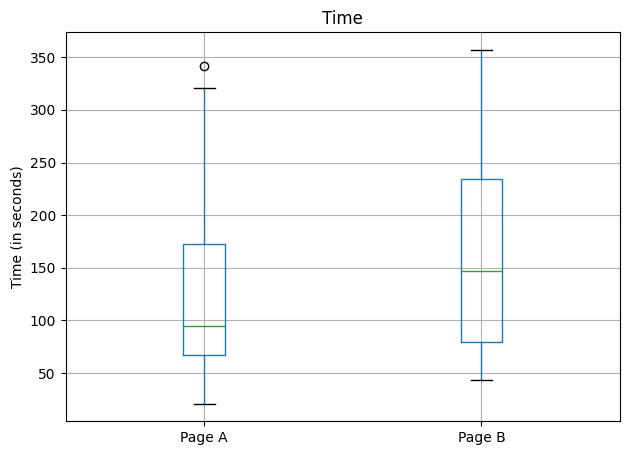

35.66666666666667


In [6]:
session_times = pd.read_csv('data/web_page_data.csv')
session_times.Time = 100 * session_times.Time

ax = session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

Page B has session times that are greater than those of A by 35.67 seconds, on average. The question is whether this difference is within the range of what random chance might produce, i.e., is statistically significant. One way to answer this is __to apply a permutation test__.

In [7]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

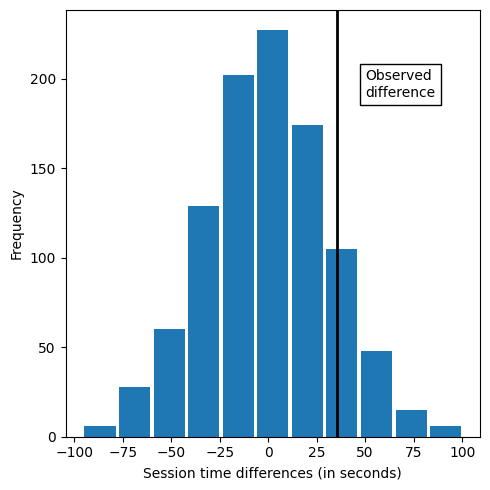

In [18]:
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]

random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
perm_diffs = np.array(perm_diffs)
print(np.mean(perm_diffs > mean_b - mean_a))

0.121


The histogram shows that mean difference of random permutations often exceeds the observed difference in session times. For our results, this happens in 12.1% of the cases. This suggests that the observed difference in session time between page A and page B is __well within the range of chance variation__ and thus is not statistically significant.

## 4. Statistical Significance and p-Values
- Significance tests are used to determine whether an observed effect is within the range of chance variation for a null hypothesis model.
- The p-value is __the probability that results as extreme as the observed results might occur, given a null hypothesis model__.
- The alpha value is the threshold of "unusualness" in a null hypothesis chance model.
- Significance testing has been much more relevant for formal reporting of research than for data science (but has been fading recently, even for the former).

__Example: Web Conversion__

Observed difference: 0.0368%


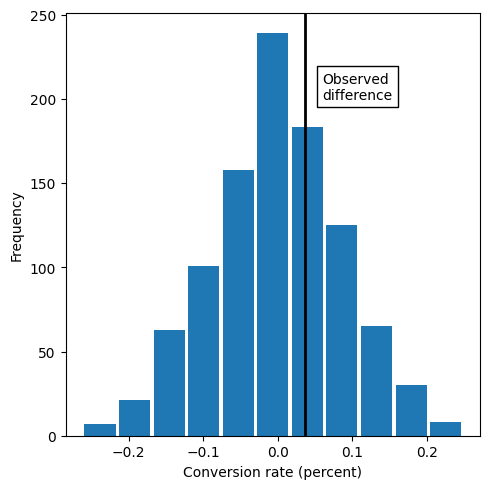

In [20]:
random.seed(1)
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) 
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histogram shows that the observed difference of 0.0368% is well within the range of chance variation. But simply looking at the graph is not a very precise way to measure statistical significance, so of more interest is the p-value.

In [21]:
print(np.mean([diff >= obs_pct_diff for diff in perm_diffs]))

0.332


The p-value is 0.332, which means that we would expect to achieve a result as extreme as this, or a more extreme result, by random chance over 30% of the time.

In this case, since we have a binomial distribution, we can approximate the p-value.

In [22]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


## 5. t-Tests
- Before the advent of computers, __resampling tests were not practical__, and statisticians used standard refrence distributions.
- A test statistic could then be standardized and compared to the reference distribution.
- One such widely used standardized statistic is the __t-statistic__.

__Example: Web Stikiness (again)__

In [23]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, 
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

tstat, pvalue, df = sm.stats.ttest_ind(
    session_times[session_times.Page == 'Page A'].Time, 
    session_times[session_times.Page == 'Page B'].Time,
    usevar='unequal', alternative='smaller')
print(f'p-value: {pvalue:.4f}')

p-value for single sided test: 0.1408
p-value: 0.1408


The-p-value of 0.1408 is fairly close to the permutation test values of 0.121. In a resampling mode, we structure the solution to reflect the observed data and the hypothesis to be tested, not worrying about whether the data is numeric or binary, whether or not sample sizes are balanced, sample variances, or a variety of other factors. In the formula world, many variations present themselves, and they can be bewildering. 

## 6. Multiple Testing
- Multiplicity in a research study or data mining project (multiple comparisons, many variables, many models, etc.) increases __the risk of concluding that something is significant just by chance__.
- For situations involving multiple statistical comparisons (i.e., multiple tests of significance), __there are statistical adjustment procedures__ (ANOVA).
- In a data mining situati,on use of a holdout sample with labeled outcome variables can help avoid misleading results.

## 7. Degrees of Freedom
- The number of degrees of freedom forms part of the calculation to standardize test statistics so they can be compared to reference distributins (t-distribution, F-distribution, etc.)
- The concept of degrees of freedom lies behind the factoring of categorical variables into n-1 indicator or dummy variables when doing a regression (to avoid multicollinearity).

## 8. ANOVA
- ANOVA is a statistical procedure for analyzing the results of an experiment __with multiple groups__.
  - Combine all the data together in a single box.
  - Shuffle and draw out four resamples of five values each (assuming we are testing the stickiness of 4 different web pages and each has 5 values).
  - Record the mean of each of the four group means.
  - Record the variance among the four group among the four group means.
  - Repeat steps 2-4 many (say, 1,000) times.
  - The proportion of the time the resampled variance exceed the observed variance is the p-value. 
- It is the extension of similar procedures for the A/B test, used to assess whether the overall variation among groups is within the range of chance variation.
- A useful outcome of ANOVA is the identification of variance components associated with group treatments, interaction effects, and errors.

__Example: Web Stickiness (4 pages)__

Text(0, 0.5, 'Time (seconds)')

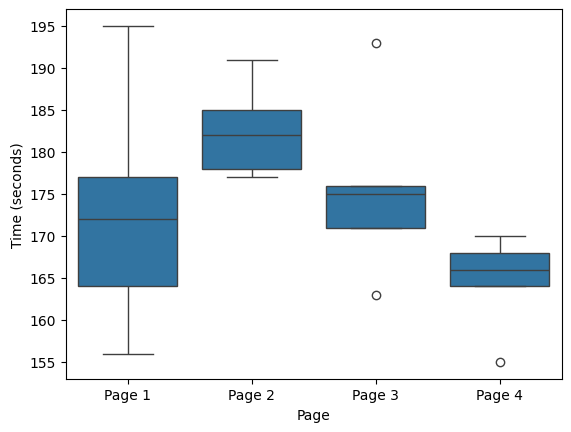

In [24]:
four_sessions = pd.read_csv('data/four_sessions.csv')

sns.boxplot(data = four_sessions,
            x = 'Page',
            y = 'Time')

plt.ylabel('Time (seconds)')

Instead of worrying about all the different comparisons between individual pages we could possibly make (6 in this case), we can do a single overall test that addresses the question, __"Could all the pages have the same underlying stickiness, and the differences among them be due to the random way in which a common set of session times got allocated among the four pages?"__

In [25]:
print(four_sessions.head())

observed_variance = four_sessions.groupby('Page').mean().var()
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)

     Page  Time
0  Page 1   164
1  Page 2   178
2  Page 3   175
3  Page 4   155
4  Page 1   172
Observed means: [172.8 182.6 175.6 164.6]
Variance: Time    55.426667
dtype: float64


44.33333333333322
p-value: 0.07733333333333334


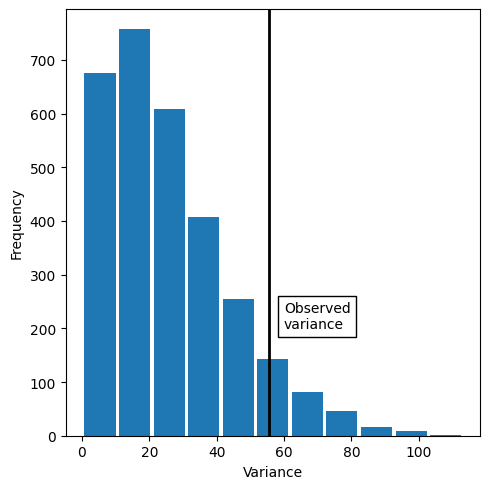

In [26]:
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var().iloc[0]
    
print(perm_test(four_sessions))

random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('p-value:', np.mean([var >= observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance.iloc[0], color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Just like the t-test can be used instead of a permutation test for comparing the mean of two groups, there is a statistical test for ANOVA based on the __F-statistic__. The F-statistic is based on the ratio of the variance across group means to the variance due to residual error. The higher this ratio, the more statistically significant the reuslt. 

In [27]:
model = smf.ols('Time ~ Page', data=four_sessions).fit()
                
aov_table = sm.stats.anova_lm(model)
print(aov_table)

res = stats.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time, 
                     four_sessions[four_sessions.Page == 'Page 2'].Time,
                     four_sessions[four_sessions.Page == 'Page 3'].Time,
                     four_sessions[four_sessions.Page == 'Page 4'].Time)
print(f'F-Statistic: {res.statistic / 2:.4f}')
print(f'p-value: {res.pvalue / 2:.4f}')

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN
F-Statistic: 1.3699
p-value: 0.0388


For the treatment means, the degrees of freedom is 3 (once three values are set, and then the grand average is set, the other treatment mean cannot vay). Sum of squares (SS) for the treatment means is the sum of squared departures between the treatment means and the grand average. For the residuals, degrees of freedom is 16 (20 ovservations, 16 of which can vary after the grand mean and the treatment means are set). SS is the sum of squared difference between each individual observations and the treatment means. 

The F-statistic is MS(treatment)/MS(error). The F value thus depends only on this ratio and can be compared to a standard F-distribution to determine whether the differences among treatment means are greater than would be expected in random chance variation.

The A/B/C/D test just described is a "one-way" ANOVA, in which we have one factor (group) that is varying. We could have a second factor involved - say, "weekend versus weekday" - with data collected on each combination (group A weekend, group A weekday, group B weekend, etc.). This would be a "two-way ANOVA," and we would handle it in similar fashion to the one-way ANOVA by identifying the "interaction effect." After identifying the grand average effect and the treatment effect, we then separate the weekend and weekday observations for each group and find the difference between the averages for those subsets and the treatment average. You can see that ANOVA and then two-way ANOVA are the first steps on the road toward a full statistical model, such as regression and logistic regression, in which multiple factors and their effects can be modeled.

## 9. Chi-Square Test

- A common procedure in statistics is to test __whether observed data counts are consistent with an assumption of independence (e.g., propensity to buy a particular item is independent of gender)__.
- The chi-squre distribution is __the reference distribution (which embodies the assumption of independence) to which the observed calculated chi-square statistic must be compared__.

__Example: 3 different headlines__

In [48]:
click_rate = pd.read_csv('data/click_rates.csv')

pd.pivot_table(data = click_rate,
               index = 'Click',
               columns = 'Headline',
               values = 'Rate'
              ).reset_index()

Headline,Click,Headline A,Headline B,Headline C
0,Click,14.0,8.0,12.0
1,No-click,986.0,992.0,988.0


The headlines certainly appear to differ. Headline A returns nearly twice the click rate of B. The actual numbers are small though. A resampling procedure can test whether theclick rates differ to an extent greater than chance might cause. For this test, we need to have the "expected" distribution of clicks, and in this case, that would be under the null hypothesis assumption that all three headlines share the same click rate, for an overall click rate of 34/3,000. Under this assumption, our contingency table would look like this.

In [40]:
row_average = clicks.mean(axis=1)

pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average,
}).reset_index()

,Click,Headline A,Headline B,Headline C
0,Click,11.333333,11.333333,11.333333
1,No-click,988.666667,988.666667,988.666667


The Pearson residual is defined as:

$$
R = \frac{(\text{Observed} - \text{Expected})}{\sqrt{\text{Expected}}}
$$

R measures the extent to which the actual counts differ from these expected counts. The chi-square statistic is defined as the sum of the squared Pearson residuals:

$$
X = \sum_{i=1}^{r} \sum_{j=1}^{c}{R^2}
$$

where r and c are the number of rows and columns, respectively. The chi-square statistic for this example is 1.666.

In [50]:
def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect
                                  for observe in row])
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [expected_clicks, expected_noclicks]
chi2observed = chi2(clicks.values, expected)
chi2observed

1.6659394708658917

Is that more than could reasonably occur in a chance model? We can test with this resampling algorithm:
- Constitute a box with 34 ones (clicks) and 2,966 zeros (no clicks).
- Shuffle, take three separate samples of 1,000, and count the clicks in each.
- Find the squared differences between shuffled counts and the expected counts and sum them.
- Repeat steps 2 and 3, say, 1,000 times.
- How often does the resampled sum of squared deviations exceed the observed? That's the p-value.

In [58]:
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def perm_fun(box):
    random.shuffle(box)
    sample_clicks = [sum(box[0:1000]),
                     sum(box[1000:2000]),
                     sum(box[2000:3000])]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.7400


The test shows that this result could easily have been obtained by randomness. Asymptotic statistical theory shows that the distribution of the chi-square statistic can be approximated by a chi-square distribution. The appropriate standard chi-square distribution is determined by the degrees of freedom. For a contingency table, the degrees of freedom are related to the number of rows (r) and columns (c) as follows:
$$
\text{degrees of freedom} = (r-1)(c-1)
$$

The chi-square distribution is typically skewed, with a long tail to the right. The further out on the chi-square distribution the observed statistic is, the lower the p-value.

In [53]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


The p-value is a little less than the resampling p-value; this is because __the chi-square distribution is only an approximation of the actual distribution of the statistic.__

__Reference: Chi-square distribution__

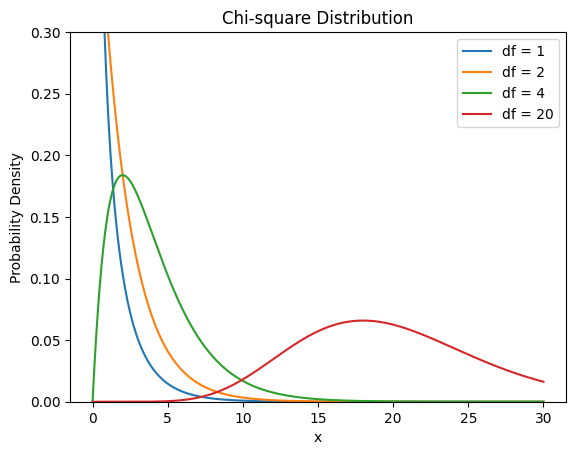

In [63]:
degrees_of_freedom = [1, 2, 4, 20]

x = np.linspace(0, 30, 1000)

for df in degrees_of_freedom:
    chi_sq_dist = chi2.pdf(x, df)
    
    plt.plot(x, chi_sq_dist, label='df = {}'.format(df))

plt.title('Chi-square Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.ylim([0, 0.3])

plt.show()

The chi-square distribution is a good approximation of the shuffled resampling test just described, except when counts are extremely low (single difits, especially five or fewer). In such cases, the resampling procedure will yield more accurate p-value. In fact, moststatistical software has a procedure to actually enumerate all the possible rearrangements (permutations) that can occur, tabulate their frequencies, and determine exactly how extreme the observed result is. This is called __Fisher's exact test__. Where some counts are very low but others are quite high (e.g., the denominator in a conversion rate), it may be necessary to do a shuffled permutation test instead of a full exact test, due to the difficulty of calculating all possible permutations.

In [64]:
# Scipy has only an implementation of Fisher's Exact test for 2x2 matrices. There is a github repository that provides a Python implementation that uses the same code as the R version. Installing this requires a Fortran compiler. 
# ```
# stats.fisher_exact(clicks)
# ```

# stats.fisher_exact(clicks.values)

The chi-square test, or Fisher's exact test, is used when you want to know whether an effect is for real or might be the product of chance. In most classical statistical applications of the chi-square test, its role is to establish statistical significance, which is typically needed before a study or an experiment can be published. This is not so important for data scientists. In most data science experiments, whether A/B or A/B/C..., the goal is not simply to establish statistical significance but rather to arrive at the best treatment. For this purpose, __multi-armed bandits__ offer a more complete solution. 

## 10. Multi-Arm Bandit Algorithm
- Traditonal A/B tests envision a random sampling process, which can lead to excessive exposure to the inferior treatment.
- Multi-arm bandits, in contrast, __alter the sampling process to incorporate information learned during the experiment and reduce the frequency of the inferior treatment__
- They also facilitate efficient treatment of more than two treatments.
- There are different algorithms for shifting sampling probability away from the inferior treatment(s) and to the (presumed) superior one.

For example, you might have multiple offers, headlines, colors, and so on being tested on a website. Customers either click or don't click. Initially, the offers are shown randomly and equally. If, however, __one offer starts to outperform the others, it can be shown more often__. But what should the parameters of the algorithm that modifies the pull rates be? What "pull rates" should we change to, and when should we change?

- Generate a uniformly distributed random number between 0 and 1.
- If the number lies between 0 and epsilon (where epsilon is s number between 0 and 1, typically fairly small), flip a fiar coin (50/50 probability), and:
  - If the coin is heads, show offer A.
  - If the coin is tails, show offer B.
- If the number is >= __epsilon__, show whichever offer has had the highest response rate to date.

Epsilon is the single parameter that governs this algorithm. If epsilon is 1, we end up with a standard simple A/B experiment (random allocation between A and B for each subject). If epsilon is 0, we end up with a purely greedy algorithm - one that chooses the best available immediate option. It seeks no further experimentation, simply assigning subjects (web visitors) to the best-performing treatment. 

## 11. Power and Sample Size
- Finding out how big a sample size you need requires thinking ahead to the statistical test you plan to conduct.
- You must specify __the minimum size of the effect__ that you want to detect.
- You must also specify __the required probability of detecting that effect size (power)__.
- Finally, you must specify __the significance level (alpha)__ at which the test will be conducted.

In [ ]:
## Power and Sample Size
# statsmodels has a number of methods for power calculation
# 
# see e.g.: https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/

effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

## Summary
The principles of experimental design - randomization of subjects into two or more groups receiving different treatments - allow us to draw valid conclusions about how well the treatments work. It is best to include a control treatment of "making no change." The subject of formal statistical inference - hypothesis testing, p-values, t-tests, adnd much more along these lines - occupies much time and space in a traditional statistics course or text, and the formality is mostly unneeded from a data science perspective. However, it remains important to recognize the role that random variation can play in fooling the human brain. __Intuitive resampling procedures (permutation and bootstrap) allow data scientists to gauge the extent to which chance variation can play a role in their data analysis__.